In [ ]:
pip install cdsapi  #Installing cdsapi

  Created wheel for cdsapi: filename=cdsapi-0.5.1-py2.py3-none-any.whl size=11702 sha256=15e2c7865ad87a33cb58055eb65e04d179f81def1d32908f0c7ef8b63a7746ee
  Stored in directory: /root/.cache/pip/wheels/1d/2e/3c/3746e0cd076320584d6f47b688da7b13a5d5d1a92606779ca4
Successfully built cdsapi


In [ ]:
#Here I have mentioned the my UID:API key. One can replace it with his/her own.  
url = 'url:https://cds.climate.copernicus.eu/api/v2'
key = 'key:62276:be0ea6fa-ec28-46ea-9517-c6d5acd74af4'
with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url:https://cds.climate.copernicus.eu/api/v2
key:62276:be0ea6fa-ec28-46ea-9517-c6d5acd74af4


In [ ]:
pip install eccodes

     |████████████████████████████████| 59 kB 2.8 MB/s 
  Created wheel for eccodes: filename=eccodes-1.3.3-py3-none-any.whl size=47968 sha256=5aaa70f7cf0162be84737ebb894da39d5054f219fe8ff70cc9dc318911055ba9
  Stored in directory: /root/.cache/pip/wheels/53/0b/0b/b029dc9ed4198e34fadc68c3efe35a4de1937889e0e675f792
  Created wheel for findlibs: filename=findlibs-0.0.2-py3-none-any.whl size=6559 sha256=100a4d69f6e688841d33bbd2c288ae270b8af7f3439606694c7f1b3d8737b5b1
  Stored in directory: /root/.cache/pip/wheels/34/e9/92/2a09d5a307252d22fb8d99b13685144b0419d98c36dba7b1c0
Successfully built eccodes findlibs


In [ ]:
!apt-get -qq install -y libeccodes0 python-cartopy python3-cartopy #Installing suppporting library for eccodes. You may not need to run this command.

Selecting previously unselected package libeccodes-data.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../00-libeccodes-data_2.6.0-2_all.deb ...
Unpacking libeccodes-data (2.6.0-2) ...
Selecting previously unselected package libeccodes0:amd64.
Preparing to unpack .../01-libeccodes0_2.6.0-2_amd64.deb ...
Unpacking libeccodes0:amd64 (2.6.0-2) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../02-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../03-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../04-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../05-python-six_1.11.0-2_all.deb ...

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle as vc
from datetime import datetime
import csv
import math
import os
import datetime
import cdsapi
BASIN = 'EP' # set WP or SP or EP or NI or SI or NA
path = os.getcwd()
#path = '/content/drive/MyDrive/AAAICode' # Replace with your current path
path1 = path + '/'+BASIN+'/'
data = pd.read_csv(path + '/ibtracs.since1980.list.v04r00.csv') #Download the required file 'ibtracs.since1980.list.v04r00.csv' and save it in current directory
data1 = data[data['BASIN'] == BASIN]
columns = ['SID', 'ISO_TIME','DIST2LAND','LAT','LON','STORM_SPEED','STORM_DIR']
data2 = data1[columns]

#Creating the folder for the BASIN
if not os.path.exists(path1):
    os.makedirs(path1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,8,9,14,19,20,25,161,162) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def getValue(value):
  try:
    float(value)
    return float(value)
  except ValueError:
    return None


In [ ]:
dataValues =  data2.values
sidIndex = data2.columns.get_loc('SID')
timeIndex = data2.columns.get_loc('ISO_TIME')
d2lIndex = data2.columns.get_loc('DIST2LAND')
latIndex = data2.columns.get_loc('LAT')
lonIndex = data2.columns.get_loc('LON')
speedIndex = data2.columns.get_loc('STORM_SPEED')
dirIndex = data2.columns.get_loc('STORM_DIR')

alldata = []
for val in dataValues:
  data = []
  sid = val[sidIndex]
  time = val[timeIndex]
  d2l = getValue(val[d2lIndex])
  lat = getValue(val[latIndex])
  lon = getValue(val[lonIndex])
  speed = getValue(val[speedIndex])
  dir = getValue(val[dirIndex])


  data.append(sid)
  data.append(time)
  data.append(d2l)
  data.append(lat)
  data.append(lon)
  data.append(speed)
  data.append(dir)

  alldata.append(data)
data2 = pd.DataFrame(alldata, columns = ['SID', 'ISO_TIME','DIST2LAND','LAT','LON','distance','direction'])

In [ ]:
d2lIndex = data2.columns.get_loc('DIST2LAND')
sidIndex = data2.columns.get_loc('SID')
sids = pd.unique(data2['SID'])
alldata = []
landfalCount = 0
notLandfallCount = 0
minOverOcean = 17 # Taking only those TC which present over ocean for first 48 hours.
y = [] # To keep record of landfall time
totalL = 0 # Total landfall time to get avergae landfall time
minL = 10000000 # To keep 
maxL = -100000000

for sid in sids:
  cyclonData = data2[data2['SID'] == sid]
  valuesC = cyclonData.values
  length = len(valuesC)
  if length <= minOverOcean+1:
    continue
  overOcean = True # To check if the TC present over ocea for first 48 hours.
  for i in range(minOverOcean):
    d2l = int(valuesC[i][d2lIndex])
    if d2l == 0:
      overOcean = False
      break
  # If not present over ocean for first 48 hours , leave the TC
  if not overOcean:
    continue
  
  isLandfall = 0
  j = minOverOcean
  #Checking if landfall happen or not.
  while(j<length):
    d2l = int(valuesC[j][d2lIndex])
    if d2l == 0:
        isLandfall = 1
        break
    j = j+1;

  lastDataIndex = j
  #If landfall happen keeping record of Min, Max, Average time to landfall.
  if isLandfall==1:
    landfalCount = landfalCount +1
    totalL = totalL + lastDataIndex
    if lastDataIndex < minL:
      minL =  lastDataIndex
    if lastDataIndex > maxL:
      maxL = lastDataIndex
    lastDataIndex = j- 8 # Keeping data atleast 24 hours before, if landfall happen
    y.append(j*3)
  else:
    notLandfallCount = notLandfallCount + 1
  
  # Keeping maximum 72 hours of data
  if lastDataIndex >25:
    lastDataIndex =  25

  #Keeping only 6 hourly data. Original data is 3 hourly. 
  for i in range(0, lastDataIndex, 2):
    val = valuesC[i]
    val = np.append(val, isLandfall)
    alldata.append(val)

print("Average Landfall time ", (totalL/landfalCount)*3)
print("max landfall time  ", maxL*3)
print("min landfall time  ", minL*3)

dataa = pd.DataFrame(alldata, columns = ['SID', 'ISO_TIME','DIST2LAND','LAT','LON','distance','direction','isLandfall'])
dataa.to_csv(path1+BASIN+'OceanCenter1.csv')  

print("landfalCount  ", landfalCount)
print("notLandfallCount  ", notLandfallCount)

Average Landfall time  132.35714285714286
max landfall time   312
min landfall time   57
landfalCount   84
notLandfallCount   661


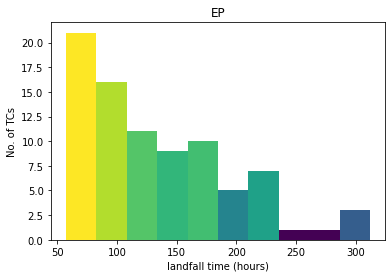

In [ ]:
#Generating histogram o f landfall time distribuiton
import matplotlib.pyplot as plt
from matplotlib import colors
fig,ax = plt.subplots(1,1)
N, bins, patches = ax.hist(y, bins = 10)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax.set_title(BASIN)
#ax.set_xticks([0,25,50,75,100])
ax.set_xlabel('landfall time (hours)')
ax.set_ylabel('No. of TCs')
plt.show()

In [ ]:
import os
import os.path

spread = 8 # Degree spread around center of cyclone. Taking 8 degree data around the TC center.

#Function to get u, v, wind and z geopotenital at three pressure levels  for a grid centerd at cyclone location. 
def getPressureData(cdsApi, year, month, date, time, lati, long, path):
  time1 = time.replace(':','_')
  fileName = path+ date +month+year+'_'+time1+'.grib'
  print('fileName  ', fileName)
  if os.path.isfile(fileName):
    print("file already exist")
    return
  cdsApi.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
             'geopotential', 'u_component_of_wind', 'v_component_of_wind',
        ],
        'pressure_level': [
            '225', '500', '700',
        ],
        'year': [
            year,
        ],
        'month': [
            month,
        ],
        'day': [
            date,
        ],
        'time': [
            time,
        ],
        'format': 'grib',
        'area': [
            lati+spread, long-spread, lati-spread,
            long+spread,
        ],
    },
    fileName)
  
def createFolder(path):
  if not os.path.exists(path):
    os.makedirs(path)
    
#Rounding lat, long to the multiple of 0.25
def roundF(x, base=.25):
    return base * round(x/base)

In [ ]:
data2 = pd.read_csv(path1+BASIN+'OceanCenter1.csv', index_col=0)
sidIndex = data2.columns.get_loc('SID') 
isoTimeIndex = data2.columns.get_loc('ISO_TIME') 
latIndex = data2.columns.get_loc('LAT') 
longIndex = data2.columns.get_loc('LON')
count = 0
dataValues = data2.values
cdsApi = cdsapi.Client()
for data in dataValues:
  print('count  ', count)
  count = count + 1
  sid = data[sidIndex]
  #Creating folder for pressure data
  folder1 = path1+'data/pressure/'+sid+'/'
  createFolder(folder1)
  isoTime = data[isoTimeIndex]
  lat = data[latIndex]
  long = data[longIndex]
  date = datetime.datetime.strptime(isoTime, '%Y-%m-%d %H:%M:%S')
  year = date.year

  year = str(year)
  month = date.month
  day = date.day
  time = date.hour

  if month < 10:
    month = '0'+str(month)
  else:
    month = str(month)

  if day < 10:
    day = '0'+str(day)
  else:
    day = str(day)

  if time<10:
    time = '0'+str(time)+':00'
  else:
    time = str(time) +':00'

  lat = roundF(lat)
  long = roundF(long)
  getPressureData(cdsApi, year, month, day, time, lat, long, folder1)

In [ ]:
#Function that return the .grib file.
def getFileName(folder, isoTime):
    date = datetime.datetime.strptime(isoTime, '%Y-%m-%d %H:%M:%S')

    year = date.year
    year = str(year)
    month = date.month
    day = date.day
    time = date.hour

    if month < 10:
      month = '0'+str(month)
    else:
      month = str(month)

    if day < 10:
      day = '0'+str(day)
    else:
      day = str(day)

    if time<10:
      time = '0'+str(time)+'_00'
    else:
      time = str(time) +'_00'

    file1 = folder+ day +month+year+'_'+time+'.grib'
    return file1

In [ ]:
#Reading .grib files and extracting u, v, z fileds for 65*65 grid.
#For each filed we have created a column for field values at each cell of grid. So for each fields we have 65*65 = 4225 columns.
import eccodes
from eccodes import *
data2 = pd.read_csv(path1+BASIN+'OceanCenter11.csv', index_col = 0, header=0)

sidIndex = data2.columns.get_loc('SID') 
isoTimeIndex = data2.columns.get_loc('ISO_TIME') 
latIndex = data2.columns.get_loc('LAT') 
longIndex = data2.columns.get_loc('LON') 
d2lIndex = data2.columns.get_loc('DIST2LAND')
isLandfallIndex = data2.columns.get_loc('isLandfall')
disIndex = data2.columns.get_loc('distance')
dirIndex = data2.columns.get_loc('direction')

sids = pd.unique(data2['SID'])
gridSize = 65
alldata = []
colums = ['SID', 'ISO_TIME','DIST2LAND','LAT','LON','distance','direction']
check = True
lengthsids = len(sids)

for i in range(lengthsids):
  sid = sids[i]
  print('sid  ',sid)
  cyclonData = data2[data2['SID'] == sid]
  valuesC = cyclonData.values
  length = len(valuesC)

  folder1 = path1 +'/data/pressure/'+sid+'/'
  for i in range(length):
    datac = []
    data = valuesC[i]
    isoTime = data[isoTimeIndex]
    lat = data[latIndex]
    long = data[longIndex]
    d2l = data[d2lIndex]
    isLand = data[isLandfallIndex]
    dis = data[disIndex]
    dir = data[dirIndex]

    datac.append(sid)
    datac.append(isoTime)
    datac.append(d2l)
    datac.append(lat)
    datac.append(long)
    datac.append(dis)
    datac.append(dir)

    pressureFile = getFileName(folder1, isoTime)
    
    id = codes_index_new_from_file(pressureFile, ["shortName",'level'])

    names = codes_index_get(id, "shortName")
    levels = codes_index_get(id, "level")

    for name in names:
      #Getting index for each name (u, v, z)
      codes_index_select(id, "shortName", name)
      for level in levels:
        #Getting index for each leval 225, 500, 700
        codes_index_select(id, "level", level)
        gid = codes_new_from_index(id)
        values = codes_get_values(gid)
        length = len(values)
        # Appening values of field for each location of grid. 
        for i in range(length):
            val = np.float32(values[i])
            datac.append(val)
            #Creating dataset columnds name
            if check:
                colums.append(name+str(level)+'_'+str(i))

    datac.append(isLand)
    if check:
      colums.append('isLandfall')
    alldata.append(datac)
    codes_index_release(id)
    check = False
  
dataa = pd.DataFrame(alldata, columns = colums)
dataa.to_csv(path1+BASIN+'pressureSSTData72hour.csv')